In [6]:
import tifffile as tiff
import matplotlib.pyplot as plt


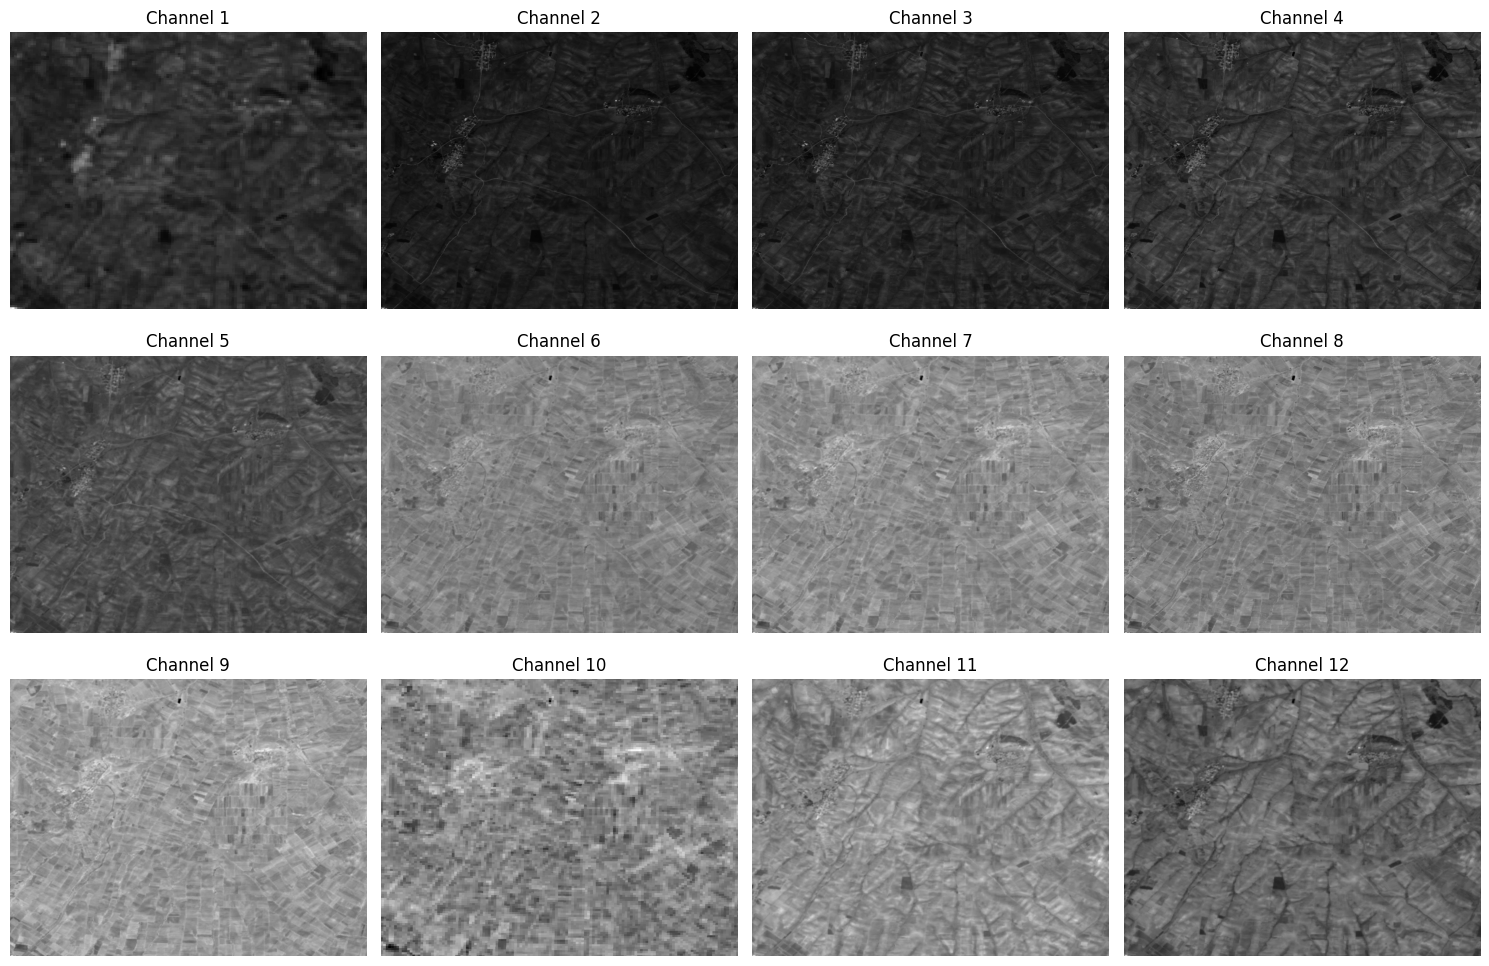

In [8]:
img_path = 'data/original_images/train_38.tif'


img = tiff.imread(img_path)

# plot all channels as subplot 
# Number of channels
num_channels = img.shape[2]

# Create subplots
fig, axes = plt.subplots(3, 4, figsize=(15, 10))

# Flatten axes array for easier iteration
axes = axes.ravel()

# Plot each channel in a separate subplot
for i in range(num_channels):
    axes[i].imshow(img[:, :, i], cmap='gray')
    axes[i].set_title(f'Channel {i+1}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [3]:
import rasterio

# Path to your Sentinel-2 image file (GeoTIFF)
image_path = 'data/original_images/train_43.tif'

# Open the image with rasterio
with rasterio.open(image_path) as dataset:
    # Print basic metadata
    print("Metadata:", dataset.meta)
    
    # Print the list of all bands included
    print("Band count:", dataset.count)
    
    # Print descriptions or other metadata (if available)
    for i in range(1, dataset.count + 1):
        print(f"Band {i} Description:", dataset.descriptions[i-1])

    # Access and print all metadata
    all_metadata = dataset.tags()
    print("All Metadata:", all_metadata)


Metadata: {'driver': 'GTiff', 'dtype': 'float64', 'nodata': None, 'width': 904, 'height': 804, 'count': 12, 'crs': CRS.from_epsg(4326), 'transform': Affine(8.983152841195215e-05, 0.0, 153.26094180293268,
       0.0, -8.983152841195215e-05, -27.716889270808952)}
Band count: 12
Band 1 Description: B1
Band 2 Description: B2
Band 3 Description: B3
Band 4 Description: B4
Band 5 Description: B5
Band 6 Description: B6
Band 7 Description: B7
Band 8 Description: B8
Band 9 Description: B8A
Band 10 Description: B9
Band 11 Description: B11
Band 12 Description: B12
All Metadata: {'AREA_OR_POINT': 'Area'}


In [1]:
import rasterio
import numpy as np

def calculate_index(band1, band2, index_name):
    """Calculates the index using the formula (Band1 - Band2) / (Band1 + Band2)."""
    np.seterr(divide='ignore', invalid='ignore')
    index = (band1 - band2) / (band1 + band2)
    return np.nan_to_num(index, nan=-9999)

def create_indices(tif_path, output_path):
    # Open the original TIFF file
    with rasterio.open(tif_path) as src:
        # Read all bands
        bands = src.read()
        profile = src.profile
        
        # Calculate indices
        ndvi = calculate_index(bands[7], bands[3], "NDVI")  # Using B8 (NIR) and B4 (Red)
        ndwi = calculate_index(bands[3], bands[10], "NDWI")  # Using B4 (Red) and B11 (SWIR)
        ndsi = calculate_index(bands[2], bands[10], "NDSI")  # Using B3 (Green) and B11 (SWIR)
        gsi = calculate_index(bands[3] - bands[1], bands[1] + bands[2] + bands[3], "GSI")  # Using B4 (Red), B2 (Blue), B3 (Green)
        
        # Stack the indices on top of the original bands
        indices_stack = np.stack([ndvi, ndwi, ndsi, gsi], axis=0)
        combined_stack = np.concatenate([bands, indices_stack], axis=0)
        
        # Update the profile to match the new number of bands
        profile.update(count=combined_stack.shape[0])

        # Write the new TIFF file with the original bands and indices
        with rasterio.open(output_path, 'w', **profile) as dst:
            dst.write(combined_stack)

    print(f"Indices added and saved to {output_path}")

# Example usage:
tif_path = 'data/original_images/train_34.tif'
output_path = 'train_34.tif'
create_indices(tif_path, output_path)


Indices added and saved to train_34.tif


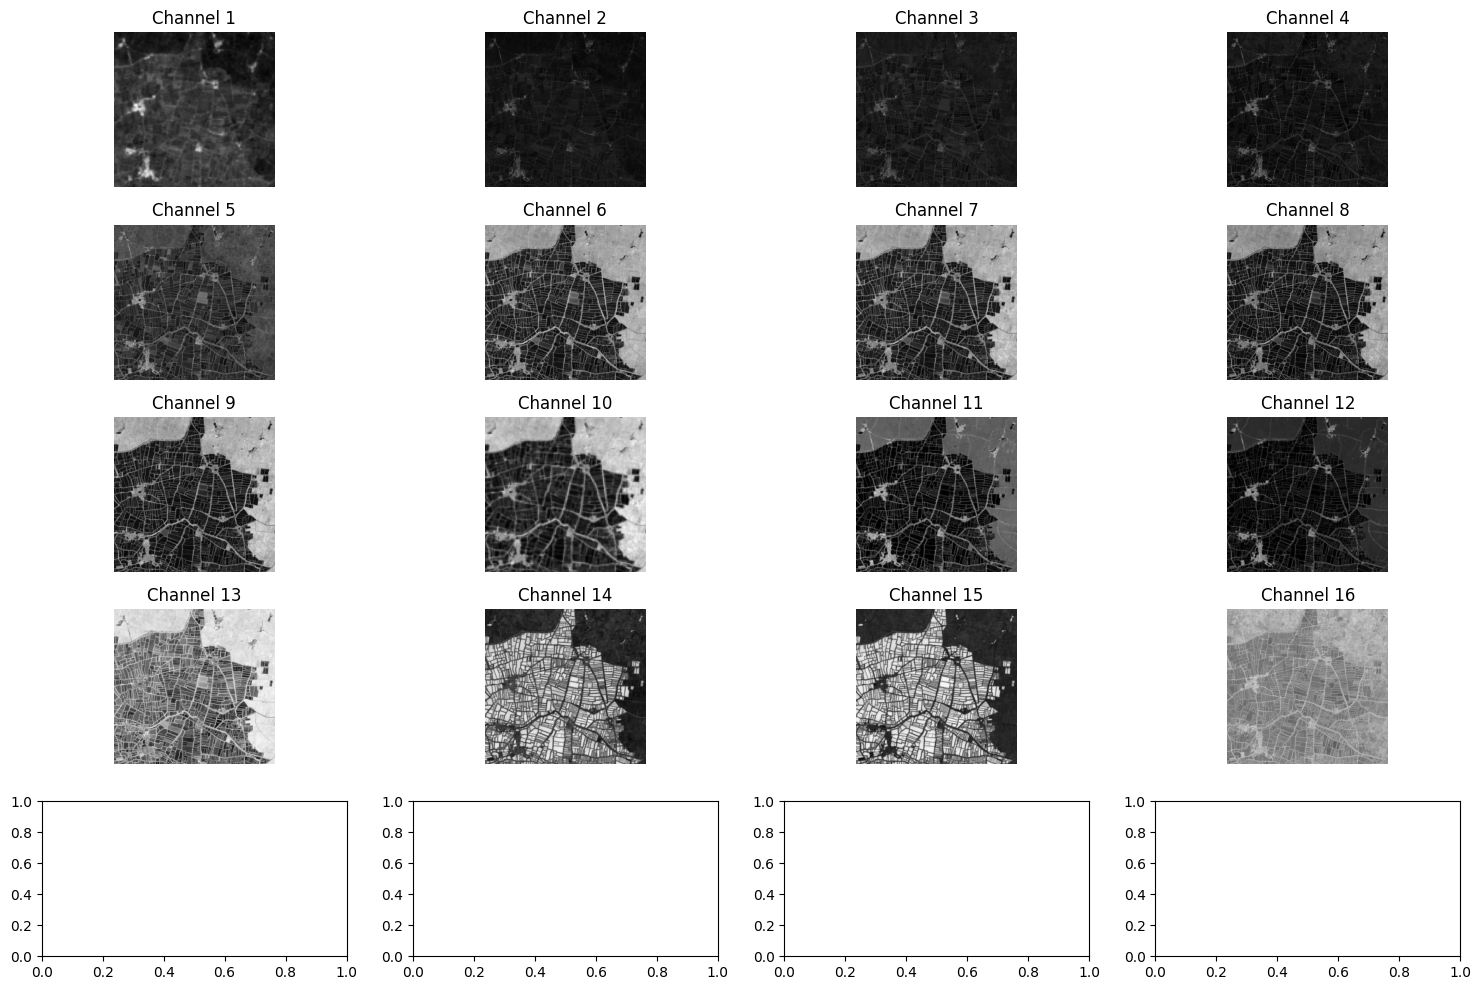

In [7]:
img_path = 'train_34.tif'
import tifffile as tiff


img = tiff.imread(img_path)

# plot all channels as subplot 
# Number of channels
num_channels = img.shape[2]

# Create subplots
fig, axes = plt.subplots(5, 4, figsize=(15, 10))

# Flatten axes array for easier iteration
axes = axes.ravel()

# Plot each channel in a separate subplot
for i in range(num_channels):
    axes[i].imshow(img[:, :, i], cmap='gray')
    axes[i].set_title(f'Channel {i+1}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()